In [232]:
import numpy as np
import matplotlib.pyplot as plt
import re
from glob import glob

### Partition

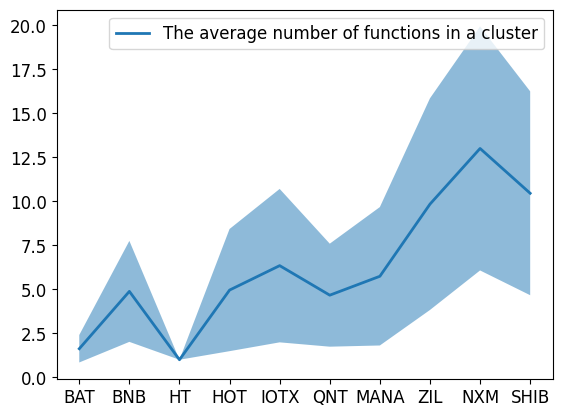

In [233]:
xs = [
    'BAT',
    'BNB',
    'HT',
    'HOT',
    'IOTX',
    'QNT',
    'MANA',
    'ZIL',
    'NXM',
    'SHIB',
]
ys = [
  [1, 1, 2, 2, 3, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 3],
  [1, 1, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 8, 8, 8, 8, 1, 1, 1, 1, 8, 1, 1, 8, 8, 1, 8, 8, 1, 8, 8, 8, 8, 1],
  [1, 2, 10, 10, 10, 1, 2, 10, 10, 10, 1, 10, 10, 10, 1, 10, 10, 10, 10, 1, 10, 10, 10, 10, 1, 1, 1, 1, 1],
  [7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 1, 1, 1, 1, 7, 1, 7, 7],
  [9, 9, 9, 1, 9, 1, 1, 1, 9, 9, 1, 1, 9, 9, 1, 1, 9, 9, 9, 9, 1, 9, 9, 9, 9, 1, 1],
  [1, 2, 14, 14, 14, 14, 1, 1, 1, 1, 14, 1, 14, 14, 14, 14, 14, 14, 14, 14, 1, 2, 1, 14, 14, 14, 14, 14, 1, 1, 14, 14, 14, 14, 14, 14, 14],
  [17, 17, 1, 17, 17, 17, 17, 1, 17, 17, 17, 1, 1, 17, 17, 1, 17, 17, 17, 17, 17, 17, 1, 17, 17, 17, 17, 17, 17, 1, 17, 17, 17, 1, 1, 17, 17, 17, 17, 1],
  [1, 14, 14, 14, 14, 14, 14, 14, 1, 14, 14, 14, 1, 14, 14, 14, 14, 14, 14, 1, 14, 14, 14, 14, 1, 14, 14, 1, 14, 14, 1, 1, 1]
]
# plt.rcParams.update({'font.size': 12})
ys_average = [np.average(x) for x in ys]
ys_min = [np.average(x) - np.std(x) for x in ys]
ys_max = [np.average(x) + np.std(x) for x in ys]
fig, ax = plt.subplots()
# ax.set_rasterized(True)
ax.fill_between(xs, ys_min, ys_max, alpha=.5, linewidth=0)
ax.plot(xs, ys_average, linewidth=2.0, label='The average number of functions in a cluster')
ax.legend()
# fig.show()
fig.savefig('cluster.pdf', format='pdf')

In [234]:
allofus = []
for y in ys:
    allofus += y
np.average(allofus)

7.38671875

In [235]:
pre = []
post = []
none = []
names = []
avg_durations = []
low_durations = []
high_durations = []
for file in [f'RQ3/{x}.txt' for x in xs]:
    txt = open(file, 'r').read()
    name = file.split('/')[1][:-4]
    num_pre = 0
    num_post = 0
    num_none = 0
    durs = []
    for line in txt.strip().split('---> DONE <---'):
        line = line.strip()
        if line.startswith('> Pre'):
            num_queries = int(re.search('Query:\s*(\d+)\s*', line).group(1))
            duration = int(re.search('Duration:\s*(\d+)\s*', line).group(1))
            if num_queries > 0:
                num_pre += 1
            else:
                num_none += 1
            durs.append(duration)
        if line.startswith('> Post'):
            num_queries = int(re.search('Query:\s*(\d+)\s*', line).group(1))
            duration = int(re.search('Duration:\s*(\d+)\s*', line).group(1))
            if num_queries > 0:
                num_post += 1
            else:
                num_none += 1
            durs.append(duration)
    avg_durations.append(np.average(durs))
    high_durations.append(np.average(durs) + np.std(durs))
    low_durations.append(np.average(durs) - np.std(durs))
    pre.append(num_pre)
    post.append(num_post)
    none.append(num_none)
    names.append(name)

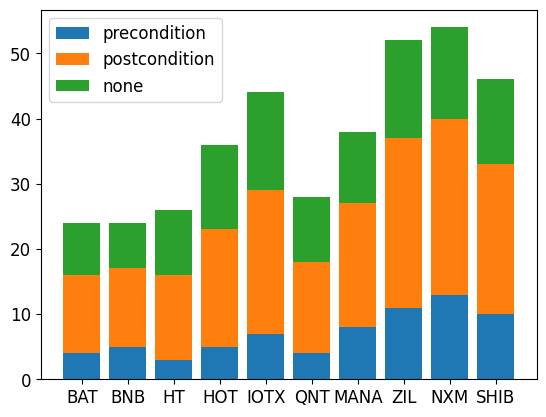

In [236]:
fig, ax = plt.subplots()
bottom = np.zeros(1)
pre = np.array(pre)
ax.bar(names, pre, bottom=bottom, label='precondition')

bottom = bottom + pre
post = np.array(post)
ax.bar(names, post, bottom=bottom, label='postcondition')

bottom = bottom + post
none = np.array(none)
ax.bar(names, none, bottom=bottom, label='none')

# ax1 = ax.twinx()
# ax1.plot(names, np.array(avg_durations)/1000, label='average duration')

ax.legend()
# ax1.legend()
fig.savefig('patches.pdf', format='pdf')

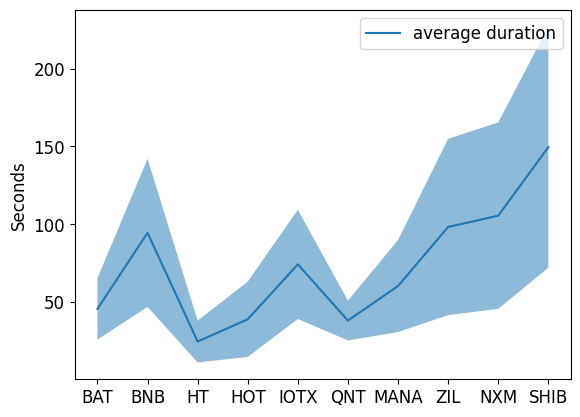

In [237]:
fig, ax = plt.subplots()
ax.set_rasterized(True)
ax.plot(names, np.array(avg_durations)/1000, label='average duration')
# print(low_durations)
ax.fill_between(names, np.array(low_durations)/1000, np.array(high_durations)/1000, alpha=.5, linewidth=0)
ax.legend()
ax.set_ylabel('Seconds')
# ax1.legend()
fig.savefig('patches_durations.pdf', format='pdf')

In [239]:
np.average(np.array(avg_durations)/1000)


72.93398868801235

In [227]:
rows = []
durations = []
for file in [f'RQ4/{x}.txt' for x in xs]:
    txt = open(file, 'r').read()
    name = file.split('/')[1][:-4]
    first = txt.split('\n')[0]
    print(len(eval(first)))
    cnt = txt.count('> Pre') + txt.count('> Post')
    duration = int(re.search('Duration:\s*(\d+)\s*', txt).group(1))
    rows.append(f'{name} & {cnt} & {"{:0.2f}".format(duration/1000)} \\\\')
    durations.append(duration)

3
2
3
1
1
1
2
1
1
1


In [218]:
print('\n'.join(rows))

BAT & 4 & 14.32 \\
BNB & 5 & 39.51 \\
HT & 3 & 14.24 \\
HOT & 5 & 18.48 \\
IOTX & 6 & 33.09 \\
QNT & 4 & 14.26 \\
MANA & 8 & 11.87 \\
ZIL & 8 & 77.18 \\
NXM & 3 & 43.91 \\
SHIB & 1 & 10.02 \\


In [229]:
np.average(durations)/1000

27.6878

In [231]:
(179 + 150 + 127 + 279 + 500 + 239 + 282 + 353 + 448 + 448)/10

300.5